/data/shared/chao/icdm2021/PoincareLinearClassification/algos.py:70: RuntimeWarning: invalid value encountered in true_divide
  return 2/np.sqrt(c)/lbda*np.arctanh(np.sqrt(c)*np.sqrt(np.dot(temp,temp)))*temp/np.sqrt(np.dot(temp,temp))


100.0
[-0.66877501  0.74346486]


/home/chaopan2/miniconda3/envs/pt/lib/python3.7/site-packages/matplotlib/__init__.py:880: MatplotlibDeprecationWarning: 
nbagg.transparent
  version, key, obj_type="rcparam", alternative=alt_key)
/data/shared/chao/icdm2021/PoincareLinearClassification/algos.py:60: RuntimeWarning: invalid value encountered in true_divide
  temp = np.tanh(np.sqrt(c)*lbda*np.sqrt(np.dot(v,v))/2)*v/np.sqrt(c)/np.sqrt(np.dot(v,v))


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
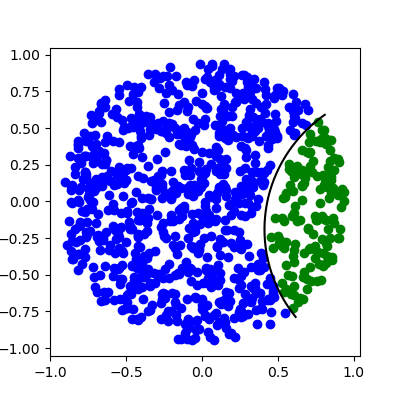

In [3]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from algos import *

"""
This notebook gives a simple example of running our hyperbolic perceptrons on sythetic data.
Visialization included.
"""

# Number of points
N = 1000 
# Number of dimension. In this experiment we restrict it to be 2 for visualization and Graham scan algorithm.
d = 2
# Upper bound of the data point norm (maximum radius).
R = 0.95
# Margin
gamma = 0.1

Flag = False
while not Flag:
    # Generating points uniformly on Poincare ball.
    # Can set the reference point p that the ground truth classifier pass through.
    N,X,y,w,p = Poincare_Uniform_Data(N,d,gamma,R = R, p = None)

    # This ensures that resulting label is not too unbalanced (5% at least). Can be modified or removed if desired.
    if (len(y[y==1])>0.05*N) and (len(y[y==-1])>0.05*N):
        Flag = True

# Estimate the reference point by our proposed heuristic algorithm.
# Here the ConvexHull correspond to Graham scan algorithm. Can change to QuickHull if desired.
# If you want d to be larger than 2, you can either generalize our QuickHull algorithm to higher dimension or directly find the minimum distance pair of +1 and -1 points.
# However, this is of higher time complexity.
CH1 = ConvexHull(X[:,y==1])
CH2 = ConvexHull(X[:,y==-1])
MDpair = minDpair(CH1,CH2)
p_hat = Weightedmidpt(MDpair[:,0],MDpair[:,1],0.5)

# Running our Hyperbolic perceptron.
# Can change option = 'second' for second order version.
# Can replace HP with WeberHP for perceptron in Weber et al. 2020.
# Can replace HP with EP for Euclidean perceptron.
w1,_ = HP(X,y,p_hat,gamma,R,a=None,option='first')
# Evaluation
acc,_ = Eval(X=X,y=y,p=p_hat,w1 = w1)
print(acc)
print(w1)

# Visualization
v = [-w1[1],w1[0]]
fig = plt.figure(figsize=(4,4)) 
plt.scatter(X[0,y==-1],X[1,y==-1],c='g')
plt.scatter(X[0,y==1],X[1,y==1],c='b')
plotgeodesic(p_hat,v=v,option='pv_line')